# <span style="color:green"> Numerical Simulation Laboratory </span>
## <span style="color:brown"> Python Exercise 11 </span>
## <span style="color:orange"> Keras - Neural Network regression </span>

### Linear fit

We start by considering the very simple case:
$$
f(x)=2x+1
$$

Let's start defining the parameters of an ideal linear function which we are going to predict through a neural network regression

In [1]:
# target parameters of f(x) = m*x + b
m = 2 # slope
b = 1 # intersect

Now let's generate a set of input data which will slightly deviate from our ideal behaviour using a random noise (that actually is set to zero):

In [2]:
import numpy as np
N_train = 2000
# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, N_train)
x_valid = np.random.uniform(-1, 1, int(N_train*0.1))
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function

sigma = 0.1# noise standard deviation, for the moment it is absent
y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)

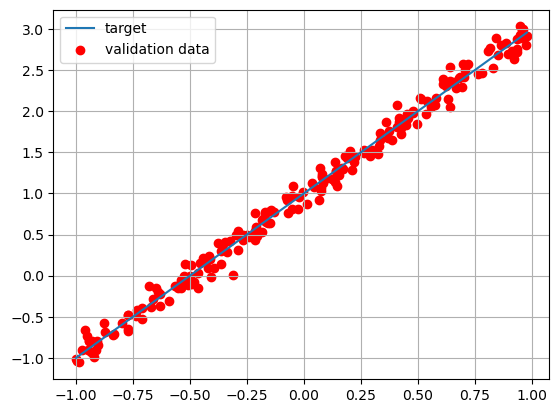

In [3]:
# plot validation and target dataset
import matplotlib.pyplot as plt
plt.plot(x_valid, y_target, label='target')
plt.scatter(x_valid, y_valid, color='r', label='validation data')
plt.legend()
plt.grid(True)
plt.show()

If you remember how a single node of a neural network works, you can easily spot that **just a single neuron can make the job**. So let's start using a simple Sequential model with just one layer on one neuron only!

In [4]:
# compose the NN model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

2025-01-09 19:35:16.849547: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-09 19:35:16.849806: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-09 19:35:16.851912: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-09 19:35:16.879419: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-01-09 19:35:17.399295: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF

In [5]:
# get a summary of our composed model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

We are now going to train our model, that is we feed the neuron with the set of training pair x, y_train from which the optimizer will find the best weights to minimize the Mean Square Error loss function (out linear regression function).

In [6]:
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
import math
N_batch = 32
history = model.fit(x=x_train, y=y_train, 
          batch_size=N_batch, epochs=30,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Epoch 1/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.5776 - mse: 3.5776 - val_loss: 1.5177 - val_mse: 1.5177
Epoch 2/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step - loss: 1.2986 - mse: 1.2986 - val_loss: 0.6098 - val_mse: 0.6098
Epoch 3/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 581us/step - loss: 0.5355 - mse: 0.5355 - val_loss: 0.2566 - val_mse: 0.2566
Epoch 4/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 673us/step - loss: 0.2274 - mse: 0.2274 - val_loss: 0.1117 - val_mse: 0.1117
Epoch 5/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 597us/step - loss: 0.0946 - mse: 0.0946 - val_loss: 0.0521 - val_mse: 0.0521
Epoch 6/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 597us/step - loss: 0.0483 - mse: 0.0483 - val_loss: 0.0277 - val_mse: 0.0277
Epoch 7/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 615us/step - loss: 0.0246 - mse: 0.0246 - val_loss: 0.0175 - val_mse: 0.0175
Epoch 8/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 606us/step - loss: 0.0154 - mse: 0.0154 - val_loss: 0.0134 - val_mse: 0.0134
Epoch 9/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 563us/step - loss

In [7]:
# return weights and biases
model.get_weights()

[array([[2.0005274]], dtype=float32), array([0.99597305], dtype=float32)]

In [8]:
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=N_batch, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 623us/step - loss: 0.0105 - mse: 0.0105

Test loss: 0.010668542236089706
Test accuracy: 0.010668542236089706


In [9]:
# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=N_batch, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 737us/step - loss: 1.7699e-05 - mse: 1.7699e-05

Test loss: 1.6299178241752088e-05
Test accuracy: 1.6299178241752088e-05


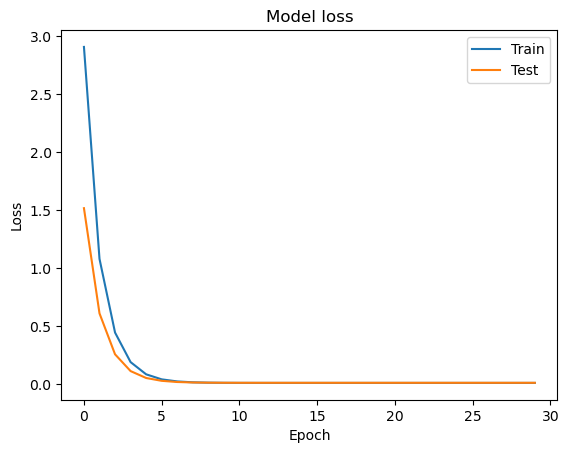

In [10]:
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

# save results to file for later use
import pandas as pd

epochs = range(1, len(history.history['loss']) + 1)
data = {
    'epoch': epochs,
    'train_loss': history.history['loss'],
    'val_loss': history.history['val_loss']
}
df = pd.DataFrame(data)  
#df.to_csv(f'linear/epochs/loss{30}.dat', index=False, header=False, sep=' ')
#df.to_csv(f'linear/sigma/loss{0.5}.dat', index=False, header=False, sep=' ')
#df.to_csv(f'linear/train/loss{2000}.dat', index=False, header=False, sep=' ')

plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


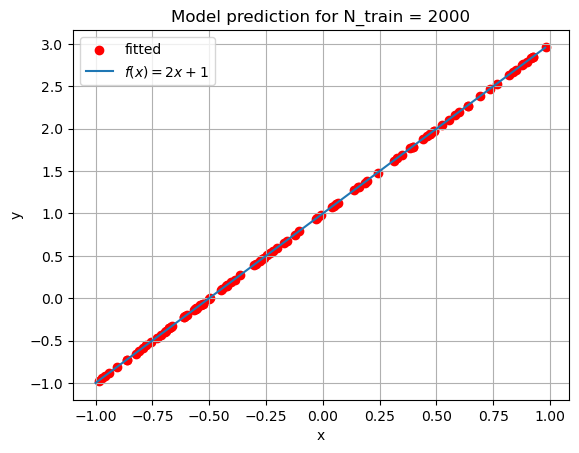

In [11]:
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r', label='fitted')
plt.plot(x_valid, y_target, label='$f(x) = 2x+1$')
plt.title(r'Model prediction for N_train = ' + str(2000))
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

# Ensure x_predicted and y_predicted are 1-dimensional
x_predicted = np.ravel(x_predicted)
y_predicted = np.ravel(y_predicted)

# save data in a file
df = pd.DataFrame({'x': x_predicted,'y':y_predicted})
#df.to_csv(f'linear/epochs/N_epochs_{30}.dat', index=False, header=False, sep=' ')
#df.to_csv(f'linear/sigma/sigma_{0.5}.dat', index=False, header=False, sep=' ')
#df.to_csv(f'linear/train/N_train_{2000}.dat', index=False, header=False, sep=' ')

### Exercise 11.1

In order to make practice with NN, explore how does the previous linear regression depend on the number of epochs, $N_{\mathrm{epochs}}$, the number of data points $N_{\mathrm{train}}$ and on the noise $\sigma$. Try to improve the previous result operating on these parameters.

Ideas to meditate on these exercises and judge your results can be found <a href=https://xkcd.com/2048/>here</a>